In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_org = pd.read_csv("loan_train.csv")
test_org = pd.read_csv("loan_test.csv")
train_org.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


Target variable is Credit Default labelled as 0(Not defaulter), 1(Defaulter)

In [3]:
train_org.shape, test_org.shape

((7500, 18), (2500, 17))

In [4]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
Id                              7500 non-null int64
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    594

Why 'Years in current job' labelled as object instead of int64 or float64?

Null values in
    Annual Income,
    Years in current job,
    Months since last delinquent,
    Bankruptcies,
    Credit score.

In [5]:
test_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
Id                              2500 non-null int64
Home Ownership                  2500 non-null object
Annual Income                   1987 non-null float64
Years in current job            2414 non-null object
Tax Liens                       2500 non-null float64
Number of Open Accounts         2500 non-null float64
Years of Credit History         2500 non-null float64
Maximum Open Credit             2500 non-null float64
Number of Credit Problems       2500 non-null float64
Months since last delinquent    1142 non-null float64
Bankruptcies                    2497 non-null float64
Purpose                         2500 non-null object
Term                            2500 non-null object
Current Loan Amount             2500 non-null float64
Current Credit Balance          2500 non-null float64
Monthly Debt                    2500 non-null float64
Credit Score                    198

Null values in
    Annual Income,
    Years in current job,
    Months since last delinquent,
    Bankruptcies,
    Credit score.

In [6]:
train_org.describe(include='all')

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.000000,7500,5.943000e+03,7129,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7500,7500,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
unique,NaN,4,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Home Mortgage,NaN,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,debt consolidation,Short Term,NaN,NaN,NaN,NaN,NaN
freq,NaN,3637,NaN,2332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5944,5556,NaN,NaN,NaN,NaN,NaN
mean,3749.500000,NaN,1.366392e+06,NaN,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,NaN,NaN,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,2165.207842,NaN,8.453392e+05,NaN,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,NaN,NaN,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,0.000000,NaN,1.645970e+05,NaN,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,1874.750000,NaN,8.443410e+05,NaN,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,NaN,NaN,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,3749.500000,NaN,1.168386e+06,NaN,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,NaN,NaN,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,5624.250000,NaN,1.640137e+06,NaN,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,NaN,NaN,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000


# Univariate Analysis

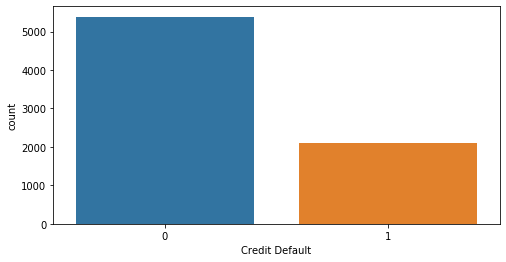

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,-1])

The target variable i.e. Credit Default is imbalanced.

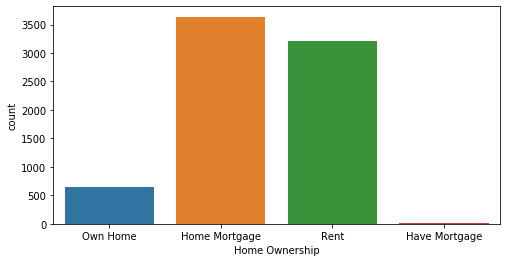

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,1])

Most of the 'Home Ownership' type is of Home Mortgage and Rent.
There is a typo in 4th column i.e Have Mortgage (need to be preprocessed).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

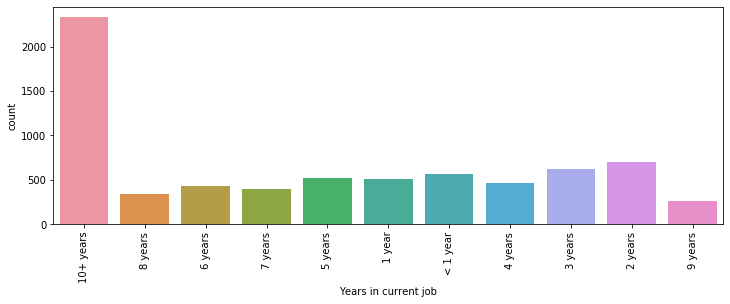

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(train_org.iloc[:,3])
plt.xticks(rotation=90)

Maximum number of customers had "10+ years" of experience.
Because of the values labelled as <1 year, 1 year, 2 years.... so on, This feature is labelled as categorical(Object) variable instead of int64 or float 64.

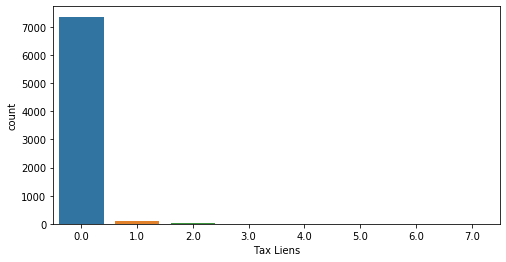

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,4])

Most of the customers had 'Tax Liens' as 0

In [11]:
train_org.iloc[:,4].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

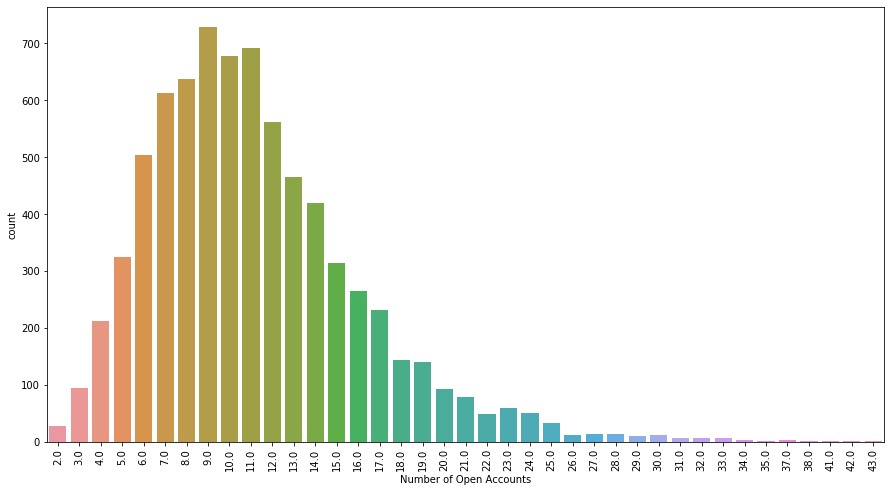

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(train_org.iloc[:,5])
plt.xticks(rotation=90)

'Number of Open Accounts' had many values ranging from 2 to 43. But most of the values lies in the range of 3 to 20, Moreover the graph is right skewed.

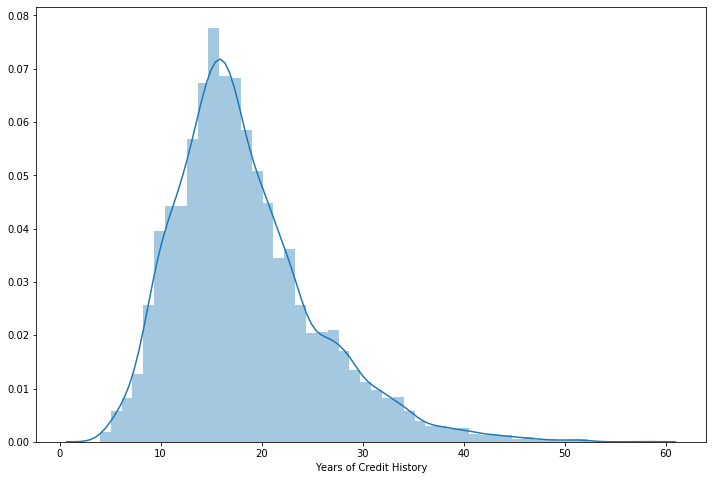

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(train_org.iloc[:,6])

'Years of Credit History' follows almost normal distribution, but seems right skewed at the end.

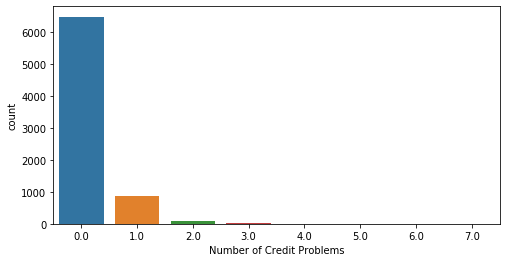

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,8])

Most of the customers had No credit problem i.e. 'Number of Credit Problems' is 0.

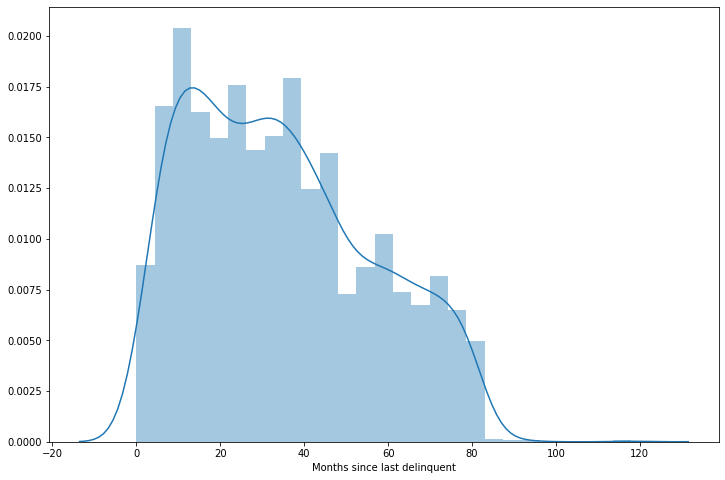

In [15]:
plt.figure(figsize=(12,8))
sns.distplot(train_org[train_org.iloc[:,9].notnull()].iloc[:,9])

The feature 'Months since last delinquent' had many null values as well as the graph is not following any normal distribution.

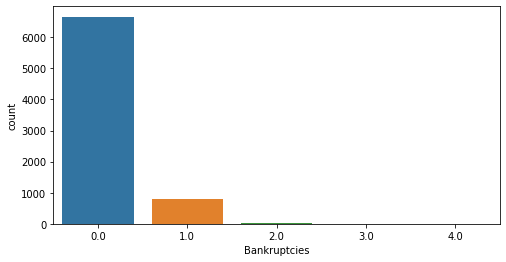

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,10])

Number of 'Bankruptcies' is 0 for many customers i.e Most of the customers had faced No issue regarding Bankruptcies.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

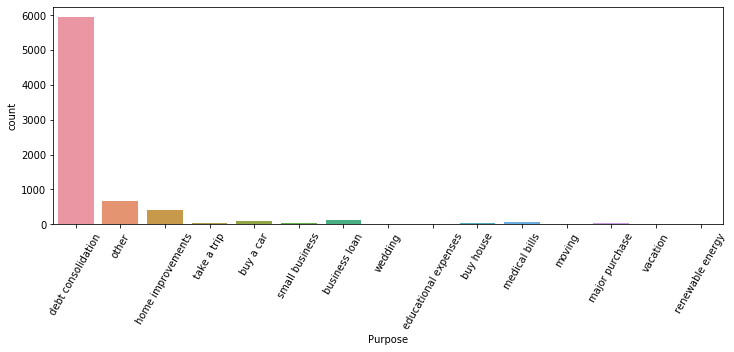

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(train_org.iloc[:,11])
plt.xticks(rotation=60)

Customers had highest purpose for 'debt consolidation' than any other mentioned purposes.

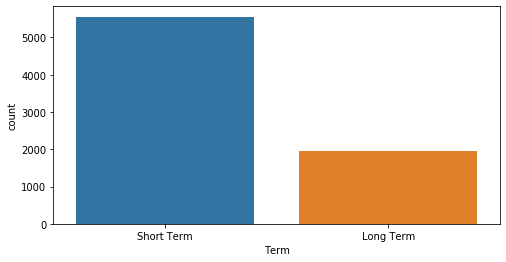

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,12])

Most of the terms are short terms. Because customers don't wanna invole in Long term loans due to burden.

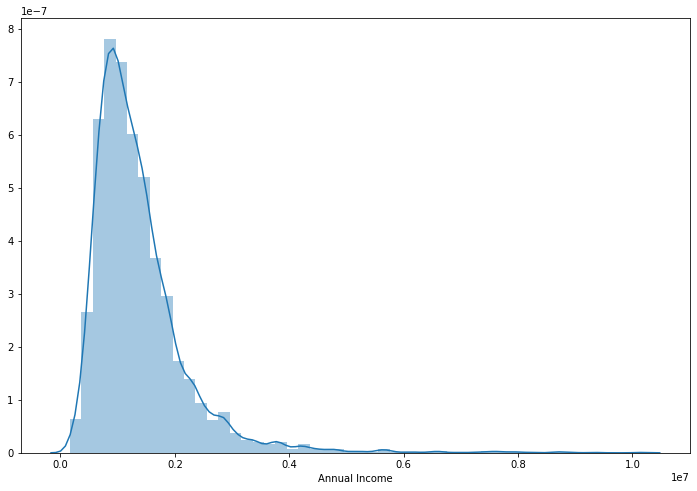

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(train_org[train_org.iloc[:,2].notnull()].iloc[:,2])

This feature has null values, but the graph is completely right skewed and has very long tail.

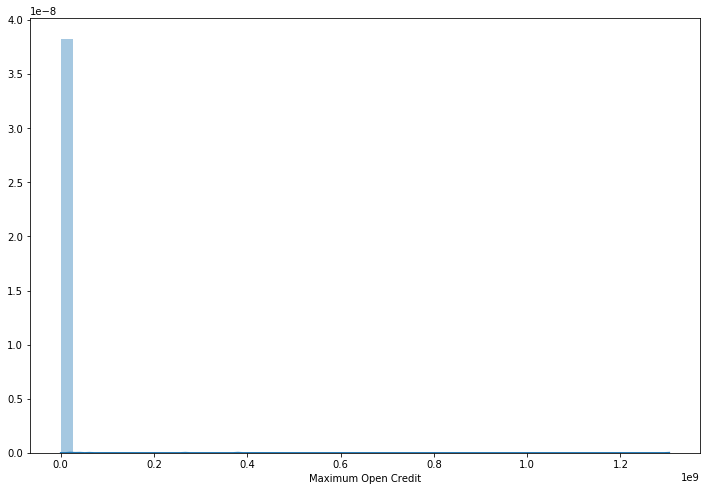

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(train_org.iloc[:,7])

This feature 'Maximum Open Credit' has no distribution and most of the data is located near 0.0

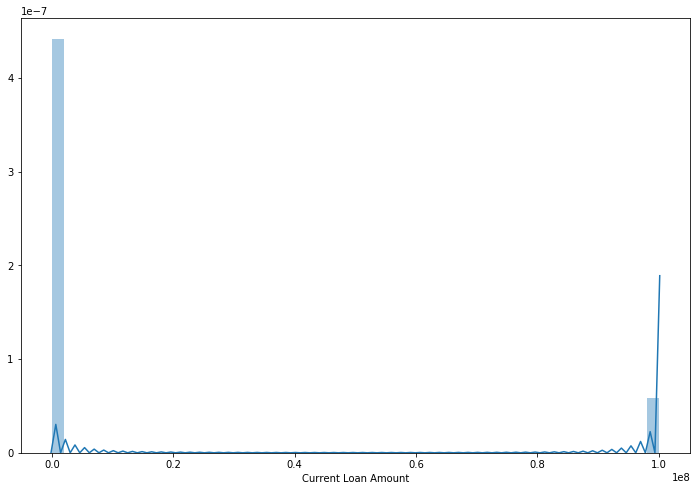

In [21]:
plt.figure(figsize=(12,8))
sns.distplot(train_org.iloc[:,13])

'Current Loan Amount' has no regular distribution of data. Has more values at beginning and end of distribution.

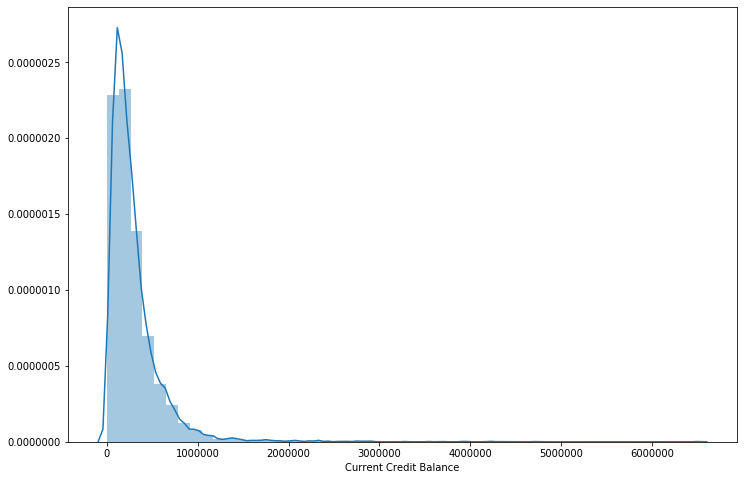

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(train_org.iloc[:,14])

'Current Credit Balance' is completely right skewed with a long tail.

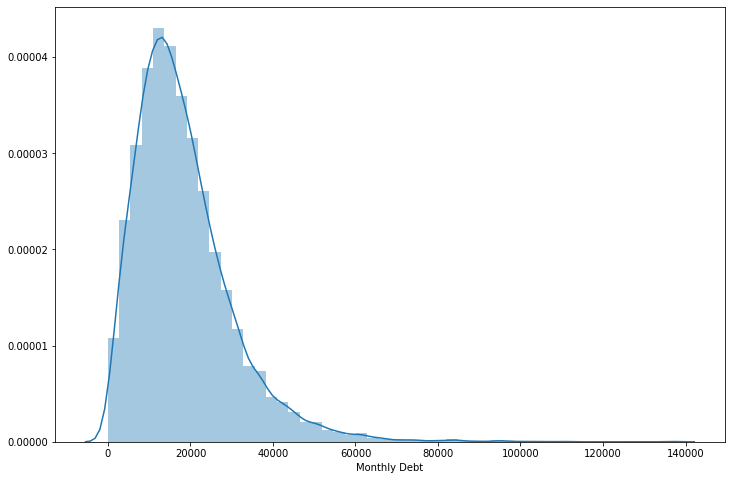

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(train_org.iloc[:,15])

The graph 'Monthly Debt' has almost followed normal distribution but has long tail at the right end.

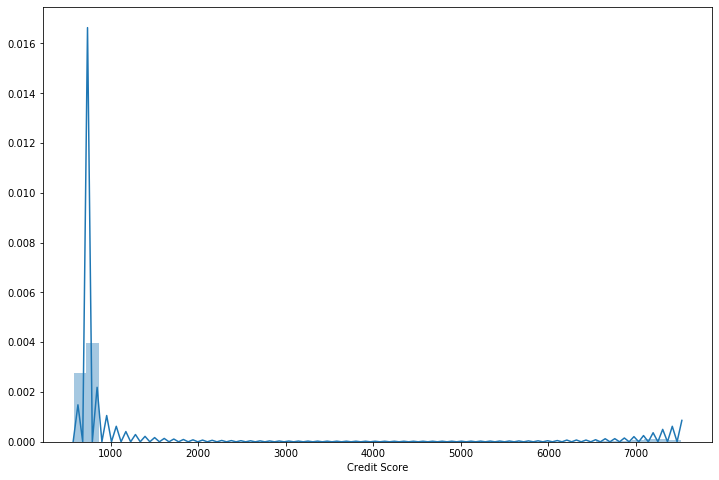

In [24]:
plt.figure(figsize=(12,8))
sns.distplot(train_org[train_org.iloc[:,16].notnull()].iloc[:,16])

The feature 'Credit Score' has no distribution over data.

In [25]:
train_org.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


# Bivariate Analysis

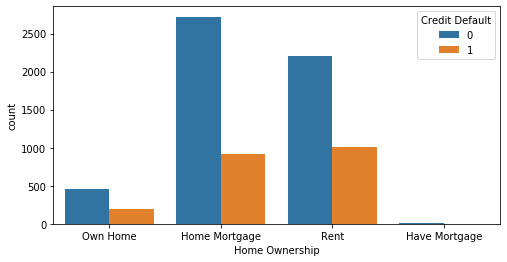

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,1],hue=train_org.iloc[:,-1])

Most of the customers are from Home Mortgage and Rent, but Rent home type custmomers are more likely to default.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

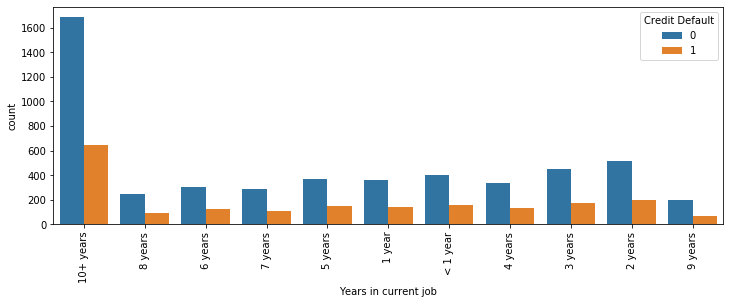

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(train_org.iloc[:,3],hue=train_org.iloc[:,-1])
plt.xticks(rotation=90)

Most of customers are from '10+ years' and high default rate  is also found in '10+ years'.

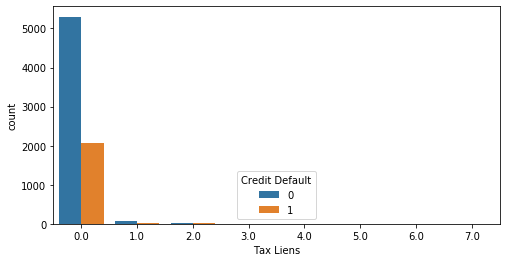

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,4],hue=train_org.iloc[:,-1])

'Tax Liens' customers as value 0 has high default and non-default customer rates.

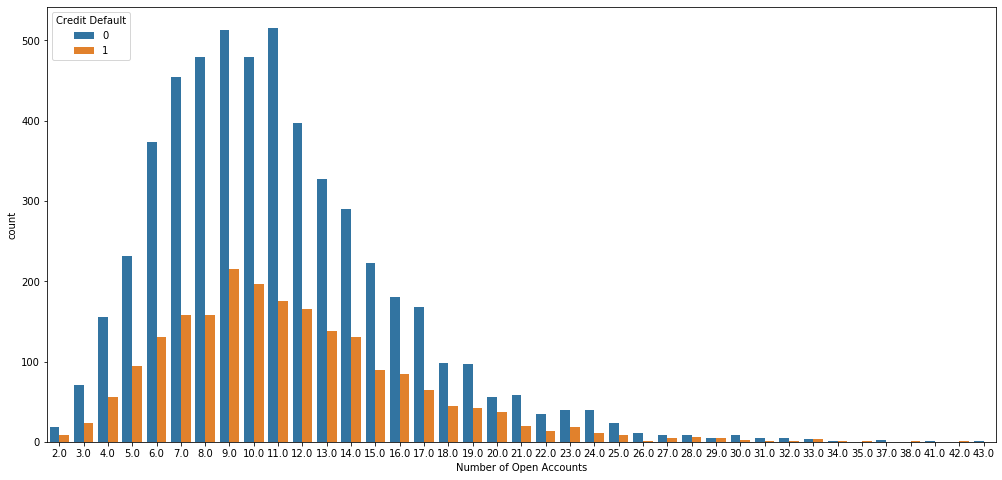

In [29]:
plt.figure(figsize=(17,8))
sns.countplot(train_org.iloc[:,5],hue=train_org.iloc[:,-1])

'Number of Open Accounts' has most of the values ranging from 3 to 20 contains most number of default and non-default customers.

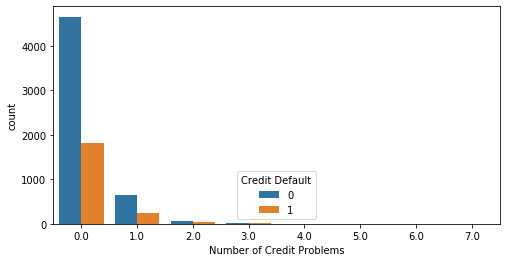

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,8],hue=train_org.iloc[:,-1])

'Number of Credit Problems' has most values as 0. Out of them default and non-default rate is high.

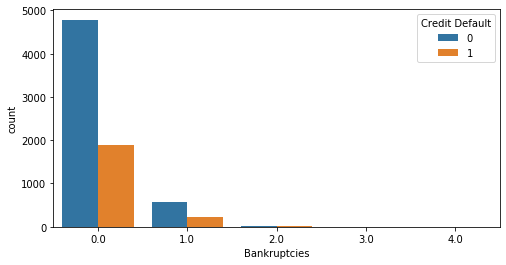

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,10],hue=train_org.iloc[:,-1])

'Bankruptcies' are 0 for most of the customers and default, non-default rate is also high between them.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

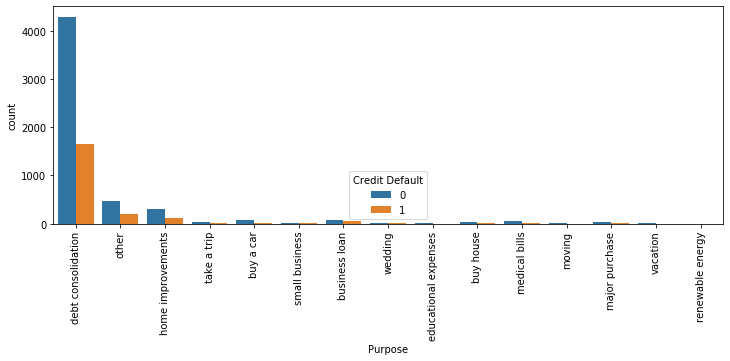

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(train_org.iloc[:,11],hue=train_org.iloc[:,-1])
plt.xticks(rotation=90)

Most of the customers had purpose 'debt consodilation' has both high default and non-default rates.

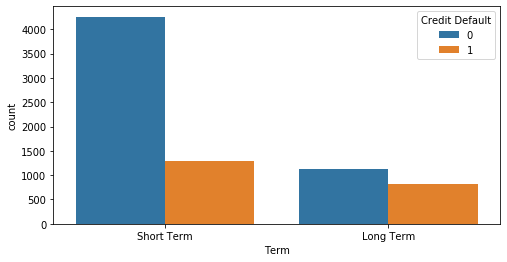

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(train_org.iloc[:,12],hue=train_org.iloc[:,-1])

Most of customers in Long Term range has no pattern for defaulting or non-defaulting because long term loans are hard to repay.
Hence, short term loan customers are having huge difference in default and non-default rates.

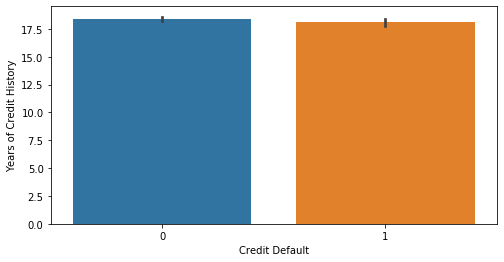

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(train_org.iloc[:,-1],train_org.iloc[:,6])

Pretty impressive, 'Years of Credit History' has no significant relation between credit default.

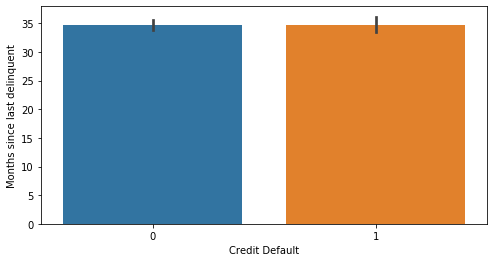

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(train_org.iloc[:,-1],train_org.iloc[:,9])

Again, 'Months since last delinquent' has no significant impact on credit default.

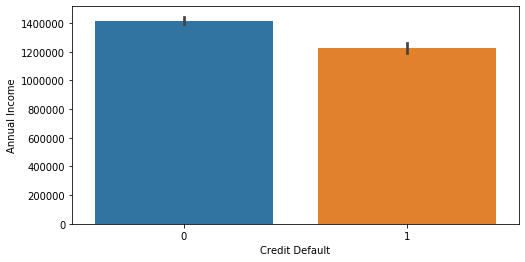

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(train_org.iloc[:,-1],train_org.iloc[:,2])

'Annual Income' for non-defaulters is slightly higher when compared to defaulters.

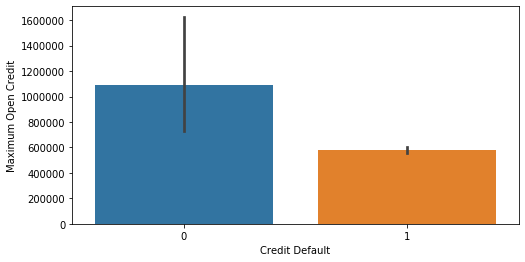

In [37]:
plt.figure(figsize=(8,4))
sns.barplot(train_org.iloc[:,-1],train_org.iloc[:,7])

'Maximum Open Credit' is high for non-defaulter without improper variance when compared to defaulters.

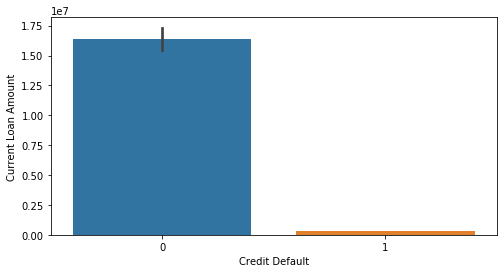

In [38]:
plt.figure(figsize=(8,4))
sns.barplot(train_org.iloc[:,-1],train_org.iloc[:,13])

This feature 'Current Loan Amount' has huge impact on credit default. For customers having high loan amount are less likely to default.
But for customers having very less loan amount has more chances to default.

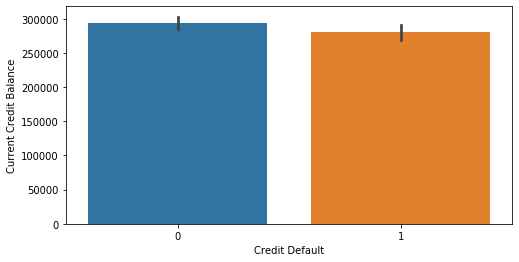

In [39]:
plt.figure(figsize=(8,4))
sns.barplot(train_org.iloc[:,-1],train_org.iloc[:,14])

'Current Credit Balance' has shown no impact on credit default.

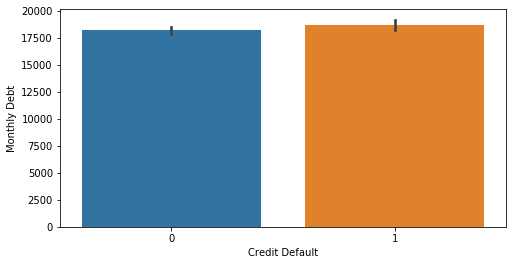

In [40]:
plt.figure(figsize=(8,4))
sns.barplot(train_org.iloc[:,-1],train_org.iloc[:,15])

'Monthly debt' has also shown no impact on credit default.

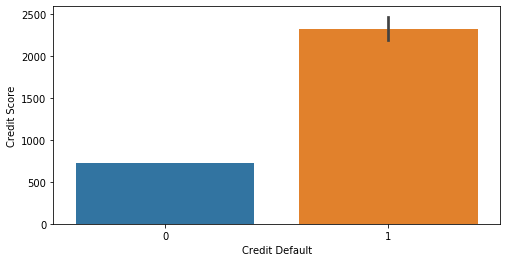

In [41]:
plt.figure(figsize=(8,4))
sns.barplot(train_org.iloc[:,-1],train_org.iloc[:,16])

The feature 'Credit Score' has good impact on credit default. Customers having high credit score has more chances to default and vice versa.

In [42]:
train_org.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


# Preprocessing

The features Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score has null values. Home Ownership feature has a typo to be corrected. 

In [43]:
train_org[train_org.iloc[:,3].isna()].describe(include='all')

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,371.000000,371,2.960000e+02,0.0,371.000000,371.000000,371.000000,3.710000e+02,371.000000,176.000000,371.000000,371,371,3.710000e+02,3.710000e+02,371.000000,296.000000,371.000000
unique,NaN,4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Home Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,debt consolidation,Short Term,NaN,NaN,NaN,NaN,NaN
freq,NaN,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274,311,NaN,NaN,NaN,NaN,NaN
mean,3647.188679,NaN,9.237692e+05,NaN,0.072776,10.242588,23.193531,6.643533e+05,0.369272,38.397727,0.247978,NaN,NaN,1.125918e+07,2.576993e+05,13793.304582,1108.716216,0.369272
std,2131.815446,NaN,5.166637e+05,NaN,0.385673,4.311571,9.907511,8.782026e+05,0.735967,20.967207,0.490962,NaN,NaN,3.132201e+07,3.234698e+05,9901.925493,1537.664009,0.483259
min,0.000000,NaN,1.758450e+05,NaN,0.000000,2.000000,4.900000,0.000000e+00,0.000000,3.000000,0.000000,NaN,NaN,2.219800e+04,0.000000e+00,373.000000,594.000000,0.000000
25%,1945.000000,NaN,5.327552e+05,NaN,0.000000,7.000000,15.600000,2.460370e+05,0.000000,22.750000,0.000000,NaN,NaN,1.217700e+05,8.769450e+04,6193.500000,707.750000,0.000000
50%,3523.000000,NaN,8.629705e+05,NaN,0.000000,10.000000,21.100000,4.474800e+05,0.000000,37.000000,0.000000,NaN,NaN,2.187460e+05,1.690240e+05,11516.000000,732.000000,0.000000
75%,5331.000000,NaN,1.205759e+06,NaN,0.000000,12.000000,29.250000,7.164630e+05,1.000000,53.250000,0.000000,NaN,NaN,4.088480e+05,3.096620e+05,19536.500000,743.000000,1.000000


In [44]:
train_org[train_org.iloc[:,3]=='< 1 year'].describe(include='all')

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,563.000000,563,4.470000e+02,563,563.000000,563.000000,563.000000,5.630000e+02,563.000000,235.000000,557.000000,563,563,5.630000e+02,5.630000e+02,563.000000,447.000000,563.000000
unique,NaN,4,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Rent,NaN,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,debt consolidation,Short Term,NaN,NaN,NaN,NaN,NaN
freq,NaN,332,NaN,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440,440,NaN,NaN,NaN,NaN,NaN
mean,3721.488455,NaN,1.204723e+06,NaN,0.015986,10.444050,16.265542,5.810186e+05,0.110124,32.727660,0.071813,NaN,NaN,1.089881e+07,2.545041e+05,16175.083481,1222.648770,0.282416
std,2140.802338,NaN,7.386802e+05,NaN,0.210305,4.797499,6.666746,7.480207e+05,0.393841,20.803576,0.284894,NaN,NaN,3.080116e+07,3.134755e+05,11149.587129,1719.163262,0.450575
min,10.000000,NaN,2.334530e+05,NaN,0.000000,2.000000,4.300000,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,1.124200e+04,0.000000e+00,906.000000,591.000000,0.000000
25%,1954.000000,NaN,6.772075e+05,NaN,0.000000,7.000000,11.500000,2.315830e+05,0.000000,16.000000,0.000000,NaN,NaN,1.557160e+05,9.419250e+04,8342.000000,714.000000,0.000000
50%,3598.000000,NaN,9.914770e+05,NaN,0.000000,10.000000,15.100000,3.966160e+05,0.000000,32.000000,0.000000,NaN,NaN,2.623060e+05,1.733940e+05,13760.000000,732.000000,0.000000
75%,5598.500000,NaN,1.500040e+06,NaN,0.000000,13.000000,20.000000,6.794920e+05,0.000000,46.500000,0.000000,NaN,NaN,4.345220e+05,3.063655e+05,21343.000000,743.500000,1.000000


In [45]:
train_org.iloc[:,3].fillna(train_org.iloc[:,3].mode()[0],inplace =True)

Filling nan values in 'Years in current job' with most repeated value i.e. mode.

In [46]:
train_org.iloc[:,[2,16]].describe()

,Annual Income,Credit Score
count,5.943000e+03,5943.000000
mean,1.366392e+06,1151.087498
std,8.453392e+05,1604.451418
min,1.645970e+05,585.000000
25%,8.443410e+05,711.000000
50%,1.168386e+06,731.000000
75%,1.640137e+06,743.000000
max,1.014934e+07,7510.000000


In [47]:
train_org[train_org.iloc[:,2].isna()].iloc[:,3].value_counts()

10+ years    548
2 years      146
3 years      130
5 years      120
< 1 year     116
1 year       106
4 years       99
7 years       88
6 years       75
9 years       70
8 years       59
Name: Years in current job, dtype: int64

In [48]:
train_org.iloc[:,1].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [49]:
train_org.iloc[:,1].replace({'Have Mortgage':'Home Mortgage'}, inplace=True)

Correcting the typo occured in 'Home Ownership'

In [50]:
train_org.iloc[:,2].fillna(train_org.iloc[:,2].median(), inplace=True)

Filling nan values in 'Annual Income' with median value.

In [51]:
train_org.iloc[:,16].fillna(train_org.iloc[:,16].median(), inplace=True)

Filling nan values in 'Credit Score' with median value.

In [52]:
train_org.iloc[:,10].fillna(0.0,inplace=True)

Filling nan values in 'Bankruptcies' with 0.0 i.e. mode value.

In [53]:
train_org.isna().sum()

Id                                 0
Home Ownership                     0
Annual Income                      0
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                       0
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                       0
Credit Default                     0
dtype: int64

Due to presence of more nan values in 'Months since last delinquent', we will be dropping this feature.

In [54]:
train_org.drop('Months since last delinquent',axis=1,inplace=True)

Applying the above modifications to test data.

In [55]:
test_org.iloc[:,1].value_counts()

Home Mortgage    1225
Rent             1020
Own Home          248
Have Mortgage       7
Name: Home Ownership, dtype: int64

In [56]:
test_org.iloc[:,1].replace({'Have Mortgage':'Home Mortgage'}, inplace=True)
test_org.iloc[:,2].fillna(test_org.iloc[:,2].median(), inplace=True)
test_org.iloc[:,16].fillna(test_org.iloc[:,16].median(), inplace=True)
test_org.iloc[:,10].fillna(0.0,inplace=True)
test_org.drop('Months since last delinquent',axis=1,inplace=True)

In [57]:
train_org = pd.get_dummies(train_org,drop_first=True)

In [58]:
test_org = pd.get_dummies(test_org,drop_first=True)

In [59]:
train_org.shape, test_org.shape

((7500, 40), (2500, 38))

In [60]:
for i in train_org.columns:
    if(i not in test_org.columns):
        print(i)

Credit Default
Purpose_renewable energy


There is an extra feature in the training set i.e. 'Purpose_renewabel energy'. So we drop this feature from training set.

In [61]:
train_org.drop('Purpose_renewable energy',axis=1,inplace=True)

In [62]:
train_org = train_org.rename(columns={'Years in current job_< 1 year':'Years in current job_ 1 year'})
test_org = test_org.rename(columns={'Years in current job_< 1 year':'Years in current job_ 1 year'})

Renamed the column 'Years in current job_< 1 year' to 'Years in current job_ 1 year' because the xgboost algorithm throwed an error on using ' < ' in the feature name. Hence it has to be modified.

In [63]:
import warnings 
warnings.filterwarnings('ignore')

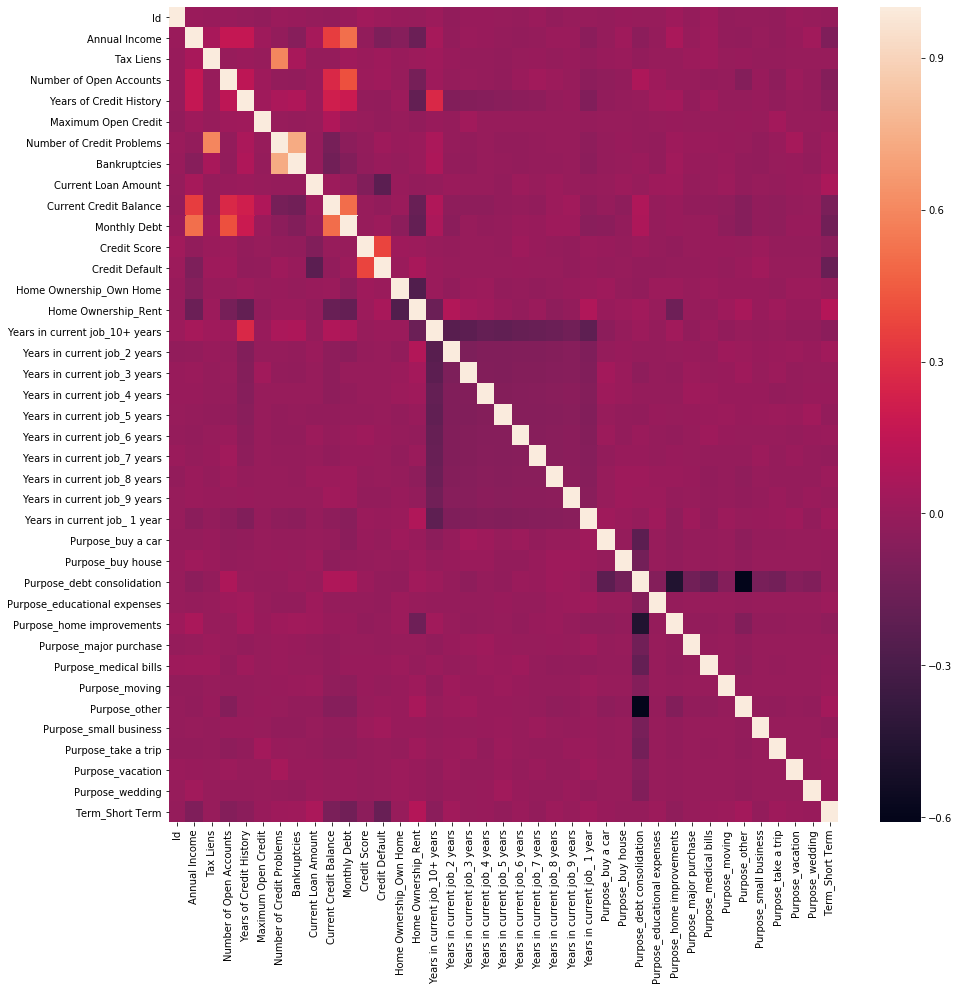

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(train_org.corr())

Let's consider all features for model building then we will get rid of multicollinearity variables.

In [65]:
X = train_org.drop('Credit Default',axis=1)
y = train_org['Credit Default']

In [66]:
X.drop('Id',axis=1,inplace=True)

In [71]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve

In [75]:
k = KFold(5, shuffle=True,random_state=0)
lr = LogisticRegression(random_state=0)
rr = RandomForestClassifier(random_state=0)
ss = SVC(random_state=0)
xx = XGBClassifier(random_state=0)

In [76]:
aa1 = cross_val_score(lr,X,y,cv=k,scoring='f1')
aa2 = cross_val_score(rr,X,y,cv=k,scoring='f1')
aa3 = cross_val_score(ss,X,y,cv=k,scoring='f1')
aa4 = cross_val_score(xx,X,y,cv=k,scoring='f1')

In [78]:
print('Mean F1_score on Logistic Regression : '+str(aa1.mean()))
print('Mean F1_score on Random Forest Classifier : '+str(aa2.mean()))
print('Mean F1_score on SVC : '+str(aa3.mean()))
print('Mean F1_score on XGBoost : '+str(aa4.mean()))

Mean F1_score on Logistic Regression : 0.3175489887380324
Mean F1_score on Random Forest Classifier : 0.4202177622703922
Mean F1_score on SVC : 0.0
Mean F1_score on XGBoost : 0.4493613423144671


All models has performed very badly.

In [236]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=26)

Text(0.5, 1, 'Confusion matrix for Logistic Regression')

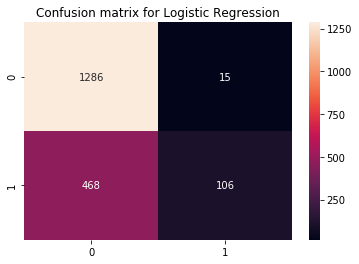

In [237]:
lr1 = LogisticRegression().fit(x_train,y_train)
sns.heatmap(confusion_matrix(y_test,lr1.predict(x_test)),annot=True,fmt='d')
plt.title('Confusion matrix for Logistic Regression')

Text(0.5, 1, 'Confusion matrix for Logistic Regression')

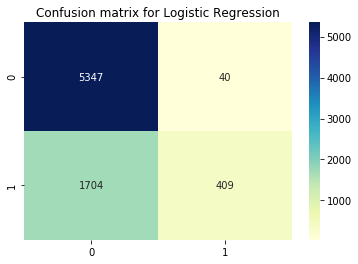

In [82]:
lr_pred = cross_val_predict(lr,X,y,cv=k)
sns.heatmap(confusion_matrix(y, lr_pred),annot=True,fmt='d',cmap="YlGnBu")
plt.title('Confusion matrix for Logistic Regression')

Text(0.5, 1, 'Confusion matrix for Random Forest Classifier')

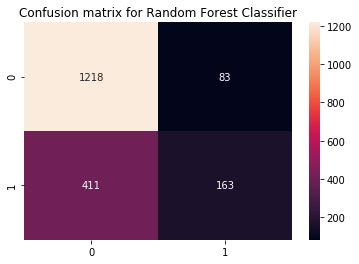

In [238]:
rr1 = RandomForestClassifier().fit(x_train,y_train)
sns.heatmap(confusion_matrix(y_test,rr1.predict(x_test)),annot=True,fmt='d')
plt.title('Confusion matrix for Random Forest Classifier')

Text(0.5, 1, 'Confusion matrix for Random Forest Classifier')

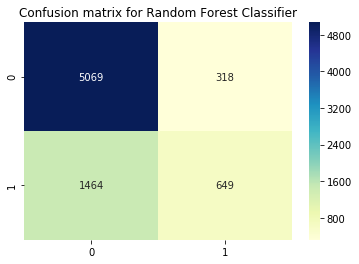

In [83]:
rr_pred = cross_val_predict(rr,X,y,cv=k)
sns.heatmap(confusion_matrix(y, rr_pred),annot=True,fmt='d',cmap="YlGnBu")
plt.title('Confusion matrix for Random Forest Classifier')

Text(0.5, 1, 'Confusion matrix for XGBoost Classifier')

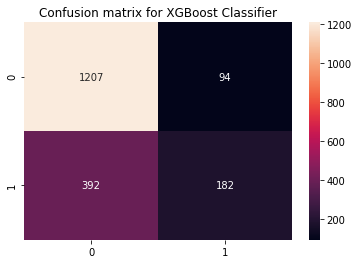

In [239]:
xx1 = XGBClassifier().fit(x_train,y_train)
sns.heatmap(confusion_matrix(y_test,xx1.predict(x_test)),annot=True,fmt='d')
plt.title('Confusion matrix for XGBoost Classifier')

Text(0.5, 1, 'Confusion matrix for XGBoost Classifier')

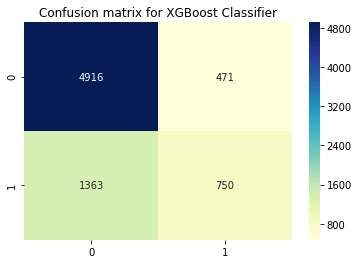

In [84]:
xx_pred = cross_val_predict(xx,X,y,cv=k)
sns.heatmap(confusion_matrix(y, xx_pred),annot=True,fmt='d',cmap="YlGnBu")
plt.title('Confusion matrix for XGBoost Classifier')

In [85]:
print('           Classification report for Logistic Regression')
print(classification_report(y,lr_pred))

           Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      5387
           1       0.91      0.19      0.32      2113

    accuracy                           0.77      7500
   macro avg       0.83      0.59      0.59      7500
weighted avg       0.80      0.77      0.71      7500



In [86]:
print('           Classification report for Random Forest Classifier')
print(classification_report(y,rr_pred))

           Classification report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      5387
           1       0.67      0.31      0.42      2113

    accuracy                           0.76      7500
   macro avg       0.72      0.62      0.64      7500
weighted avg       0.75      0.76      0.73      7500



In [87]:
print('           Classification report for XGBoost Classifier')
print(classification_report(y,xx_pred))

           Classification report for XGBoost Classifier
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      5387
           1       0.61      0.35      0.45      2113

    accuracy                           0.76      7500
   macro avg       0.70      0.63      0.65      7500
weighted avg       0.74      0.76      0.73      7500



In [243]:
prob = lr1.predict_proba(x_test)
prob = prob[:,1]
print('AUC_ROC score forr Logisitic Regression : '+str(roc_auc_score(y_test,prob)))

AUC_ROC score forr Logisitic Regression : 0.7049455390787573


In [244]:
prob1 = rr1.predict_proba(x_test)
prob1 = prob1[:,1]
print('AUC_ROC score forr Random Forest Classifier : '+str(roc_auc_score(y_test,prob1)))

AUC_ROC score forr Random Forest Classifier : 0.6949599209399363


In [245]:
prob2 = xx1.predict_proba(x_test)
prob2 = prob2[:,1]
print('AUC_ROC score forr XGBoost Classifier : '+str(roc_auc_score(y_test,prob2)))

AUC_ROC score forr XGBoost Classifier : 0.7256238165763672


Text(0.5, 1.0, 'Probability curve for Logistic Regression')

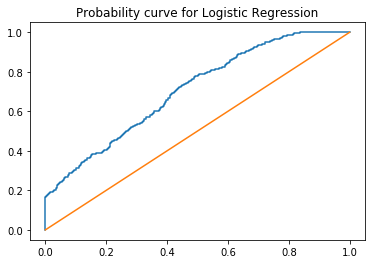

In [246]:
fpr, tpr, ts = roc_curve(y_test,prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Probability curve for Logistic Regression')

Text(0.5, 1.0, 'Probability curve for Random Forest Classifier')

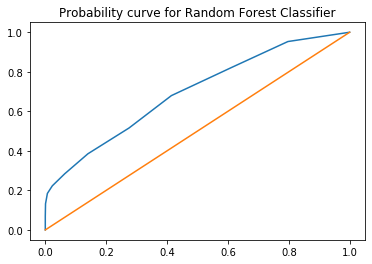

In [247]:
fpr, tpr, ts = roc_curve(y_test,prob1)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Probability curve for Random Forest Classifier')

Text(0.5, 1.0, 'Probability curve for XGBoost Classifier')

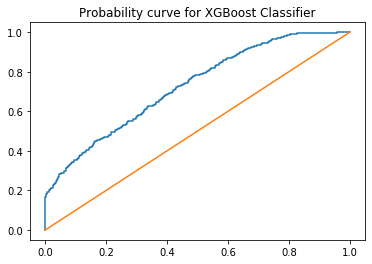

In [248]:
fpr, tpr, ts = roc_curve(y_test,prob2)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Probability curve for XGBoost Classifier')

In [249]:
from sklearn.naive_bayes import GaussianNB
gg = GaussianNB()
aa5 = cross_val_score(gg,X,y,cv=k)
aa5.mean()

0.4174666666666667

Hence, we found that considering all features. The AUC_ROC score has highest of 72.5%

In [109]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scale = scale.fit_transform(X)

In [90]:
lr_scale = LogisticRegression(random_state=0)
rr_scale = RandomForestClassifier(random_state=0)
ss_scale = SVC(random_state=0)
xx_scale = XGBClassifier(random_state=0)

In [91]:
aa1_scale = cross_val_score(lr_scale,X_scale,y,cv=k,scoring='f1')
aa2_scale = cross_val_score(rr_scale,X_scale,y,cv=k,scoring='f1')
aa3_scale = cross_val_score(ss_scale,X_scale,y,cv=k,scoring='f1')
aa4_scale = cross_val_score(xx_scale,X_scale,y,cv=k,scoring='f1')

In [92]:
print('Mean F1_score on Logistic Regression scaled : '+str(aa1_scale.mean()))
print('Mean F1_score on Random Forest Classifier scaled: '+str(aa2_scale.mean()))
print('Mean F1_score on SVC scaled : '+str(aa3_scale.mean()))
print('Mean F1_score on XGBoost scaled : '+str(aa4_scale.mean()))

Mean F1_score on Logistic Regression scaled : 0.3948250978612529
Mean F1_score on Random Forest Classifier scaled: 0.420960301610081
Mean F1_score on SVC scaled : 0.3152295081897706
Mean F1_score on XGBoost scaled : 0.44923284336243885


In [100]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
gnb_scale = GaussianNB()
mnb_scale = MultinomialNB()
knn_scale = KNeighborsClassifier()
gnb_scale_score = cross_val_score(gnb_scale,X_scale,y,cv=k,scoring='f1')
#mnb_scale_score = cross_val_score(mnb_scale,X_scale,y,cv=k,scoring='f1')
knn_scale_score = cross_val_score(knn_scale,X_scale,y,cv=k,scoring='f1')

In [101]:
print('Mean F1_score on GaussianNB scaled : '+str(gnb_scale_score.mean()))
print('Mean F1_score on KNN scaled : '+str(knn_scale_score.mean()))

Mean F1_score on GaussianNB scaled : 0.4864212543147339
Mean F1_score on KNN scaled : 0.42353753621588497


Text(0.5, 1, 'Confusion matrix for GNB Classifier')

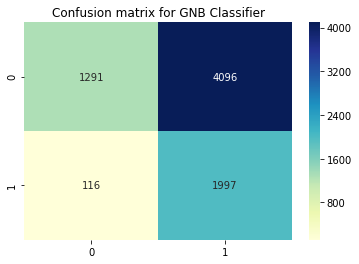

In [102]:
gnb_pred = cross_val_predict(gnb_scale,X_scale,y,cv=k)
sns.heatmap(confusion_matrix(y, gnb_pred),annot=True,fmt='d',cmap="YlGnBu")
plt.title('Confusion matrix for GNB Classifier')

In [124]:
gnb_pred_1 = cross_val_predict(gnb_scale,X_scale,y,cv=k,method='predict_proba')

In [125]:
gnb_pred_1 = gnb_pred_1[:,1]

In [136]:
gnb_pred_1_cls = (gnb_pred_1 >0.8).astype('int')

In [137]:
f1_score(y, gnb_pred_1_cls)

0.48803343041661384

Text(0.5, 1, 'Confusion matrix for GNB Classifier')

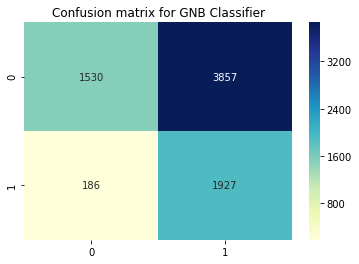

In [138]:
sns.heatmap(confusion_matrix(y, gnb_pred_1_cls),annot=True,fmt='d',cmap="YlGnBu")
plt.title('Confusion matrix for GNB Classifier')

# Feature Selection

Using RFE method:

In [144]:
from sklearn.feature_selection import RFE

In [151]:
lr_rfe = LogisticRegression()
rfe = RFE(lr_rfe)
rfe = rfe.fit(X_scale_1,y)

In [153]:
rr_rfe = RandomForestClassifier()
rfe_scale = RFE(rr_rfe)
rfe_scale = rfe_scale.fit(X_scale_1,y)

In [147]:
X_scale_1 = pd.DataFrame(X_scale, columns=X.columns)
X_scale_1.head(2)

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Short Term
0,-1.114304,-0.110953,-0.026674,1.133645,-0.016174,1.664779,2.545732,2.76052,-0.762772,-0.872085,...,-0.241094,-0.073225,-0.097761,-0.038325,-0.311919,-0.058981,-0.070412,-0.032677,-0.044766,0.591517
1,-0.396190,-0.110953,0.788223,-0.428528,0.014763,-0.340979,-0.337099,-0.36362,0.330781,0.004909,...,-0.241094,-0.073225,-0.097761,-0.038325,-0.311919,-0.058981,-0.070412,-0.032677,-0.044766,-1.690569


In [154]:
gg = pd.DataFrame({'columns':X_scale_1.columns, 'included':rfe_scale.support_, 'index':rfe_scale.ranking_})
gg[gg.included==True]

,columns,included,index
0,Annual Income,True,1
2,Number of Open Accounts,True,1
3,Years of Credit History,True,1
4,Maximum Open Credit,True,1
5,Number of Credit Problems,True,1
7,Current Loan Amount,True,1
8,Current Credit Balance,True,1
9,Monthly Debt,True,1
10,Credit Score,True,1
11,Home Ownership_Own Home,True,1


In [155]:
li = list(X_scale_1.columns[rfe_scale.support_])
len(li)

18

In [156]:
X_scale_rfe = X_scale_1[li]

In [254]:
x_train_rfe = x_train[li]
x_test_rfe = x_test[li]

Top features extracted by the RFE method and their heatmap is shown below.

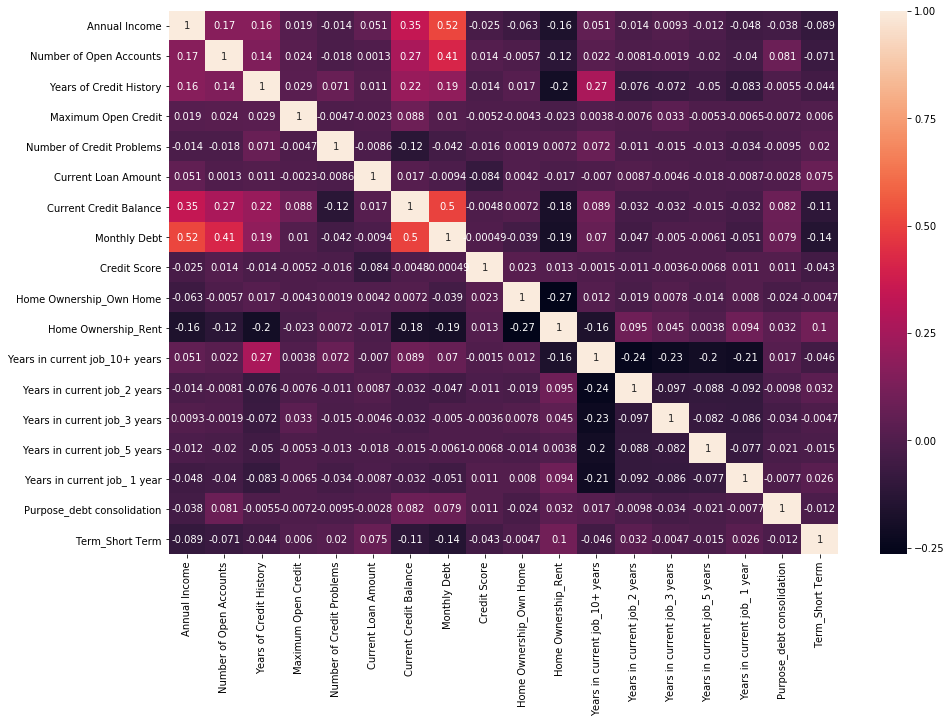

In [157]:
plt.figure(figsize=(15,10))
sns.heatmap(X_scale_rfe.corr(),annot=True)

Few featues are showing multicollinearity.

Text(0.5, 1, 'Confusion matrix for Logistic Regression using RFE')

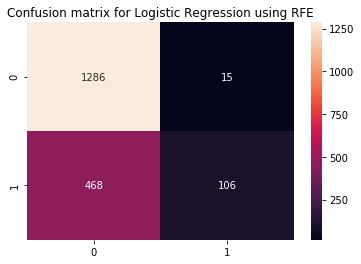

In [256]:
lr_rfe.fit(x_train_rfe, y_train)
sns.heatmap(confusion_matrix(y_test,lr_rfe.predict(x_test_rfe)), annot=True, fmt='d')
plt.title('Confusion matrix for Logistic Regression using RFE')

Text(0.5, 1, 'Confusion matrix for Logistic Regression using RFE')

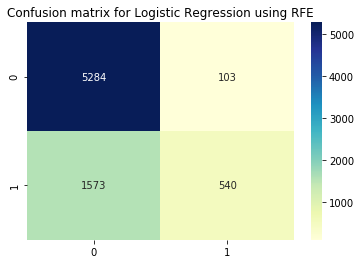

In [158]:
lr_rfe = LogisticRegression().fit(X_scale_rfe,y)
lr_pred_rfe = cross_val_predict(lr_rfe,X_scale_rfe,y,cv=k)
sns.heatmap(confusion_matrix(y, lr_pred_rfe),annot=True,fmt='d',cmap="YlGnBu")
plt.title('Confusion matrix for Logistic Regression using RFE')

In [162]:
rr_rfe.fit(X_scale_rfe,y)
rr_pred_rfe = cross_val_score(rr_rfe,X_scale_rfe,y,cv=k,scoring='f1')
rr_pred_rfe.mean()

0.42588274357009254

In [163]:
xx_rfe = XGBClassifier().fit(X_scale_rfe,y)
xx_pred_rfe = cross_val_score(xx_rfe,X_scale_rfe,y,cv=k,scoring='f1')
xx_pred_rfe.mean()

0.45935789865191934

In [191]:
gnb_rfe = GaussianNB().fit(X_scale_rfe,y)
gnb_pred_rfe = cross_val_score(gnb_rfe,X_scale_rfe,y,cv=k,scoring='f1')
gnb_pred_rfe.mean()

0.48938044573020145

In [192]:
gnb_pred_2 = cross_val_predict(gnb_rfe,X_scale_rfe,y,cv=k,method='predict_proba')
gnb_pred_2 = gnb_pred_2[:,1]

In [193]:
gnb_pred_2_cls = (gnb_pred_2 >0.9).astype('int')

In [194]:
f1_score(y, gnb_pred_2_cls)

0.4947006588370095

Text(0.5, 1, 'Confusion matrix for XGBoost classifier using RFE')

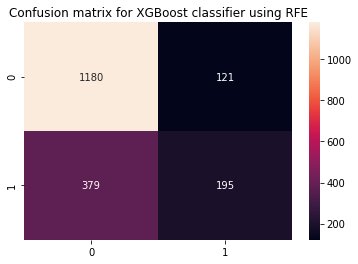

In [257]:
xx_rfe = XGBClassifier().fit(x_train_rfe,y_train)
sns.heatmap(confusion_matrix(y_test,xx_rfe.predict(x_test_rfe)), annot=True, fmt='d')
plt.title('Confusion matrix for XGBoost classifier using RFE')

Text(0.5, 1, 'Confusion matrix for Random Forest Classifier using RFE')

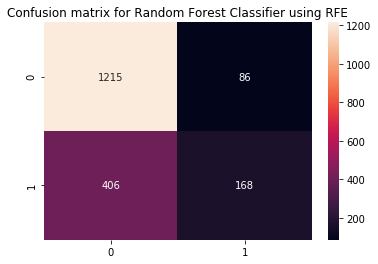

In [258]:
rr_rfe = RandomForestClassifier().fit(x_train_rfe,y_train)
sns.heatmap(confusion_matrix(y_test,rr_rfe.predict(x_test_rfe)), annot=True, fmt='d')
plt.title('Confusion matrix for Random Forest Classifier using RFE')

In [259]:
prob = lr_rfe.predict_proba(x_test_rfe)
prob = prob[:,1]
print('AUC_ROC score forr Logisitic Regression : '+str(roc_auc_score(y_test,prob)))

AUC_ROC score forr Logisitic Regression : 0.7049455390787573


In [260]:
prob1 = rr_rfe.predict_proba(x_test_rfe)
prob1 = prob1[:,1]
print('AUC_ROC score forr Logisitic Regression : '+str(roc_auc_score(y_test,prob1)))

AUC_ROC score forr Logisitic Regression : 0.7053285197395731


In [261]:
prob2 = xx_rfe.predict_proba(x_test_rfe)
prob2 = prob2[:,1]
print('AUC_ROC score forr Logisitic Regression : '+str(roc_auc_score(y_test,prob2)))

AUC_ROC score forr Logisitic Regression : 0.7326553950726726


By using RFE method for feature selection, We have AUC_ROC score of highest as 73.2%

Now, Using PCA method:

In [262]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train)

In [263]:
np.cumsum(pca.explained_variance_ratio_)

array([0.75437263, 0.99952767, 0.99994032, 0.99999994, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [264]:
pca = PCA(n_components=15)
x_train_pca = pca.fit_transform(x_train)

Considering top 15 features for prediction.

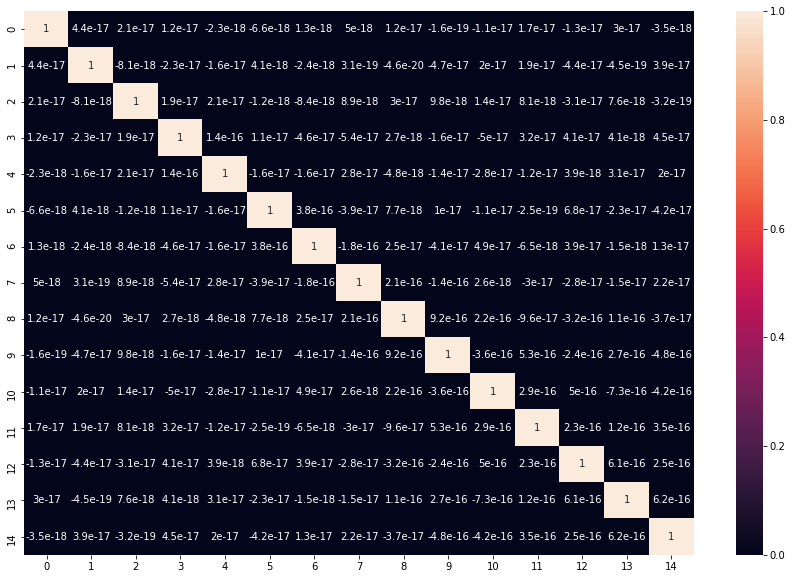

In [265]:
plt.figure(figsize=(15,10))
sns.heatmap(np.corrcoef(x_train_pca.T),annot=True)

All features are having almost 0 multicollinearity, which is a good sign.

In [266]:
x_test_pca = pca.transform(x_test)

In [267]:
x_test.shape, x_test_pca.shape

((1875, 37), (1875, 15))

In [268]:
lr_pca = LogisticRegression().fit(x_train_pca,y_train)
rr_pca = RandomForestClassifier().fit(x_train_pca,y_train)
xx_pca = XGBClassifier().fit(x_train_pca,y_train)

Text(0.5, 1, 'Confusion matrix for Logistic Regression using PCA')

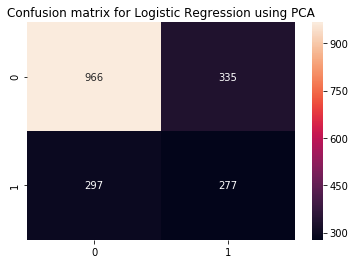

In [269]:
sns.heatmap(confusion_matrix(y_test,lr_pca.predict(x_test_pca)), annot=True, fmt='d')
plt.title('Confusion matrix for Logistic Regression using PCA')

Text(0.5, 1, 'Confusion matrix for Random Forest Classifier using PCA')

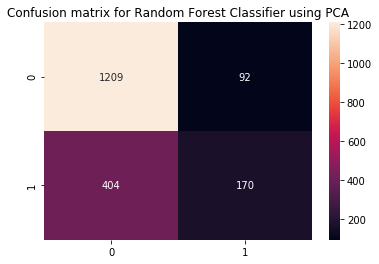

In [270]:
sns.heatmap(confusion_matrix(y_test,rr_pca.predict(x_test_pca)), annot=True, fmt='d')
plt.title('Confusion matrix for Random Forest Classifier using PCA')

Text(0.5, 1, 'Confusion matrix for XGBoost Classifier using PCA')

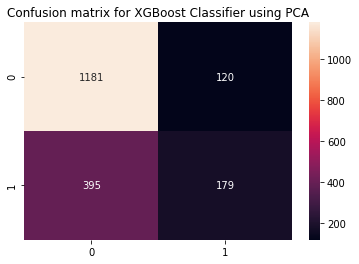

In [271]:
sns.heatmap(confusion_matrix(y_test,xx_pca.predict(x_test_pca)), annot=True, fmt='d')
plt.title('Confusion matrix for XGBoost Classifier using PCA')

In [272]:
prob2 = xx_pca.predict_proba(x_test_pca)
prob2 = prob2[:,1]
print('AUC_ROC score for XGBoost using PCA : '+str(roc_auc_score(y_test,prob2)))

AUC_ROC score for XGBoost using PCA : 0.7164630798608413


In [273]:
test_org.shape

(2500, 38)

In [104]:
test_orgg = test_org.copy()

In [105]:
test_orgg.drop('Id',axis=1,inplace=True)

In [276]:
test_org_pca = pca.transform(test_orgg)
test_org_pca.shape

(2500, 15)

In [277]:
test_org_rfe = test_orgg[li]

In [278]:
test_orgg.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Short Term
0,1178475.0,0.0,9.0,12.5,220968.0,0.0,0.0,162470.0,105906.0,6813.0,...,0,0,0,0,0,0,0,0,0,1
1,231838.0,0.0,6.0,32.7,55946.0,0.0,0.0,78298.0,46037.0,2318.0,...,0,0,0,0,0,0,0,0,0,1
2,1152540.0,0.0,10.0,13.7,204600.0,0.0,0.0,200178.0,146490.0,18729.0,...,0,0,0,0,0,0,0,0,0,1
3,1220313.0,0.0,16.0,17.0,456302.0,0.0,0.0,217382.0,213199.0,27559.0,...,0,0,0,0,0,0,0,0,0,1
4,2340952.0,0.0,11.0,23.6,1207272.0,0.0,0.0,777634.0,425391.0,42605.0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
test_orgg_scale = scale.transform(test_orgg)

In [112]:
X_scale[:2]

array([[-1.11430357, -0.11095342, -0.02667429,  1.13364485, -0.01617419,
         1.66477923,  2.54573197,  2.76051988, -0.76277203, -0.87208458,
        -0.21893241,  3.2545296 , -0.86360295,  1.33217671, -0.32210675,
        -0.30019374, -0.25827233, -0.27181457, -0.24539871, -0.23610007,
        -0.21757701, -0.18912573, -0.28488419, -0.11386819, -0.06748317,
         0.51164107, -0.0365392 , -0.24109419, -0.0732252 , -0.09776063,
        -0.0383252 , -0.31191881, -0.05898073, -0.07041159, -0.0326773 ,
        -0.04476615,  0.5915167 ],
       [-0.39618987, -0.11095342,  0.78822254, -0.42852756,  0.01476281,
        -0.34097888, -0.33709904, -0.36362021,  0.33078088,  0.00490911,
        -0.22727594,  3.2545296 , -0.86360295,  1.33217671, -0.32210675,
        -0.30019374, -0.25827233, -0.27181457, -0.24539871, -0.23610007,
        -0.21757701, -0.18912573, -0.28488419, -0.11386819, -0.06748317,
         0.51164107, -0.0365392 , -0.24109419, -0.0732252 , -0.09776063,
        -0.03832

In [139]:
gnb_scale.fit(X_scale,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [141]:
vv = gnb_scale.predict_proba(test_orgg_scale)
vv = vv[:,1]
vv = (vv>0.8).astype('int')

In [204]:
test_orgg_rfe = test_orgg[li]
vv1_prob = cross_val_predict(gnb_rfe,x= test_orgg_rfe, cv=k, method='predict_proba')
vv1 = vv1_prob[:,1]

TypeError: Singleton array array(None, dtype=object) cannot be considered a valid collection.

In [203]:
vv1_prob[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [197]:
vv1_ = (vv1>0.5).astype('int')

In [201]:
1 in vv1_

False

In [184]:
sub = pd.DataFrame({'Id':[x for x in range(7500,10000)], 'Credit Default':vv1})
sub.to_csv('Loan_defaulter.csv',index=False)